## Normal Distribution
***

In [1]:
# define and explain main concepts
# visual plots to explain concepts

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
np.random.normal()

-0.4247337330013922

### Introduction

### Definition

Normal distribution also known as Gaussian or bell-curved distribution is a type of continuous probability distribution for independent random variables [1](https://en.wikipedia.org/w/index.php?title=Normal_distribution&oldid=1129344614). 
Being a continuous distribution means that the values of variables can fall anywhere in its range unlike the discrete distribution with limited or finite outcomes. It is a symmetrically shaped distribution with most of its values gathering around the centre. It commonly occurs in nature and therefore represents a very important concept in inferential statistics for analysing and predicting properties of the population. 

### Formula

Probability density function for a normal distribution is:

$$ p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2 \sigma^2}}$$

x - random variable  
$\pi$ = 3.14159  
e = 2.71828  
$\mu$ - mean  
$\sigma$ - standard deviation  
$\sigma^2$ - variance

### Parameters

The main parameters of the normal distribution are the **mean** ($\mu$) representing the average and the **standard deviation** ($\sigma$) representing the measure of dispersion of data around the mean. The higher the standard deviation the wider the distribution. [2](https://en.wikipedia.org/wiki/Standard_deviation). While the $\mu$ and $\sigma$ are the parameters of the population, the standard deviation of a sample is represented with s and the mean with $\overline x$. Standard deviation is a square root of the variance $\sigma^2$.    

Using the formula we can plot the normal distribution setting the values of mu and sigma 

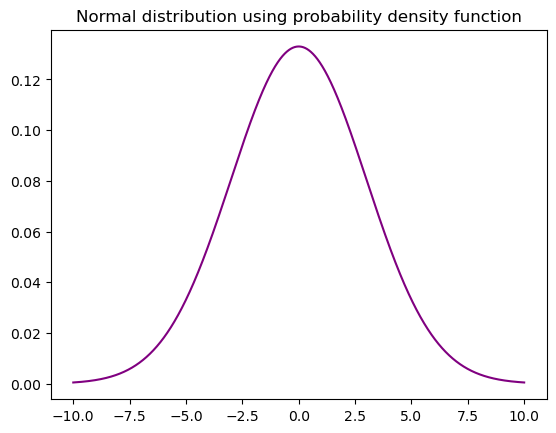

In [53]:
mu, sigma = 0.0, 3.0

# for the x axis we can use arange or the linspace function;
# if we are using a non-integer step, such as 0.1, better to use numpy.linspace

x = np.linspace(-10.0, 10.0, 10000)

y = 1.0/np.sqrt(2 * np.pi * sigma**2) * np.exp(-((x-mu)**2/(2*sigma**2)))

plt.plot(x, y, color='purple')
plt.title('Normal distribution using probability density function');

In [ ]:
### Plots

Explore:  
 * Measures of Central Tendency  
 * pdf and cdf  
 * parameters  
 * empirical rule  
 * maximum entropy distribution?
 * z-values



### References:
 * Mcloughlin, I., (2022). GitHub repository, https://github.com/ianmcloughlin/2223-S1-fund-data-analysis/blob/main/notebooks/04-outliers.ipynb  
 * Wikipedia contributors. (2022, December 24). Normal distribution. In Wikipedia, The Free Encyclopedia. Retreived December 26, 2022 from https://en.wikipedia.org/w/index.php?title=Normal_distribution&oldid=1129344614  
 * Wikipedia contributors. (2022, November 9). Standard deviation. In Wikipedia, The Free Encyclopedia. Retrieved December 27, 2022 from https://en.wikipedia.org/w/index.php?title=Standard_deviation&oldid=1120954441  
 * https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html  
 * 